In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [12]:
with open('../../output/weights/p_date=2022-10-03-18_58_55/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

21001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
slice = 100000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 2_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print()
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

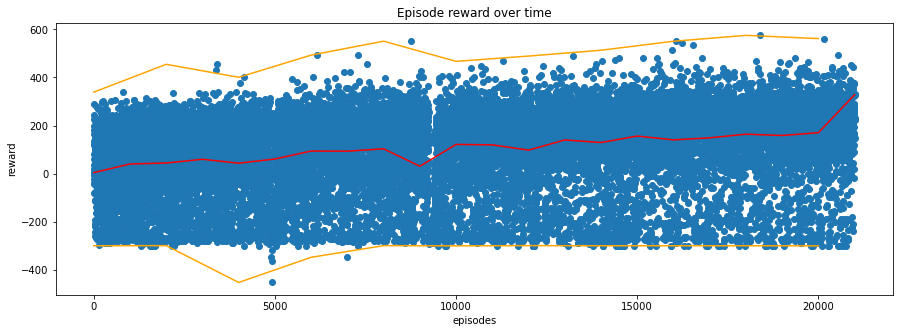

Maximum: 574.9000000000001
Average: 101.19459549545235
Moving Average (simple): {0: 4.3, 1000: 40.4, 2000: 44.4, 3000: 59.9, 4000: 43.7, 5000: 61.0, 6000: 94.1, 7000: 93.6, 8000: 103.4, 9000: 30.9, 10000: 121.8, 11000: 119.9, 12000: 97.9, 13000: 140.2, 14000: 129.5, 15000: 156.4, 16000: 140.6, 17000: 149.1, 18000: 164.2, 19000: 158.8, 20000: 170.4, 21000: 328.5}

Moving Average: ['+839% (40.4 | 839%)', '+9% (44.4 | 932%)', '+34% (59.9 | 1293%)', '-27% (43.7 | 916%)', '+39% (61.0 | 1318%)', '+54% (94.1 | 2088%)', '0% (93.6 | 2076%)', '+10% (103.4 | 2304%)', '-70% (30.9 | 618%)', '+294% (121.8 | 2732%)', '-1% (119.9 | 2688%)', '-18% (97.9 | 2176%)', '+43% (140.2 | 3160%)', '-7% (129.5 | 2911%)', '+20% (156.4 | 3537%)', '-10% (140.6 | 3169%)', '+6% (149.1 | 3367%)', '+10% (164.2 | 3718%)', '-3% (158.8 | 3593%)', '+7% (170.4 | 3862%)', '+92% (328.5 | 7539%)']
Minimum: -452.0


In [5]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

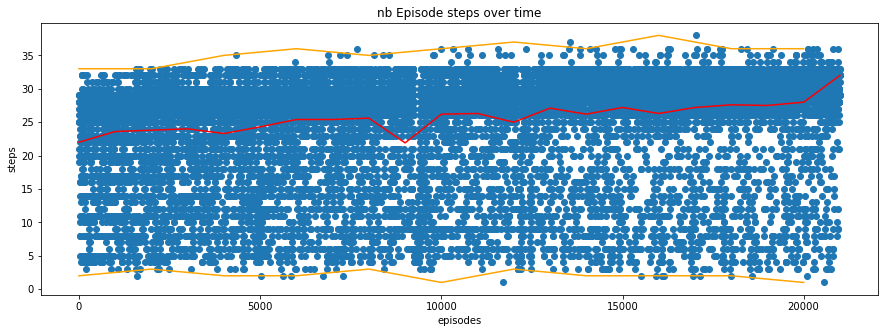

Maximum: 38
Average: 25.420646635874483
Moving Average (simple): {0: 22.0, 1000: 23.6, 2000: 23.8, 3000: 24.0, 4000: 23.3, 5000: 24.3, 6000: 25.4, 7000: 25.4, 8000: 25.6, 9000: 21.9, 10000: 26.2, 11000: 26.3, 12000: 25.0, 13000: 27.1, 14000: 26.2, 15000: 27.2, 16000: 26.3, 17000: 27.2, 18000: 27.6, 19000: 27.5, 20000: 28.0, 21000: 32}

Moving Average: ['+7% (23.6 | 7%)', '+0% (23.8 | 8%)', '+0% (24.0 | 9%)', '-2% (23.3 | 5%)', '+4% (24.3 | 10%)', '+4% (25.4 | 15%)', '0% (25.4 | 15%)', '+0% (25.6 | 16%)', '-14% (21.9 | 0%)', '+19% (26.2 | 19%)', '+0% (26.3 | 19%)', '-4% (25.0 | 13%)', '+8% (27.1 | 23%)', '-3% (26.2 | 19%)', '+3% (27.2 | 23%)', '-3% (26.3 | 19%)', '+3% (27.2 | 23%)', '+1% (27.6 | 25%)', '0% (27.5 | 25%)', '+1% (28.0 | 27%)', '+14% (32.0 | 45%)']
Minimum: 1


In [6]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

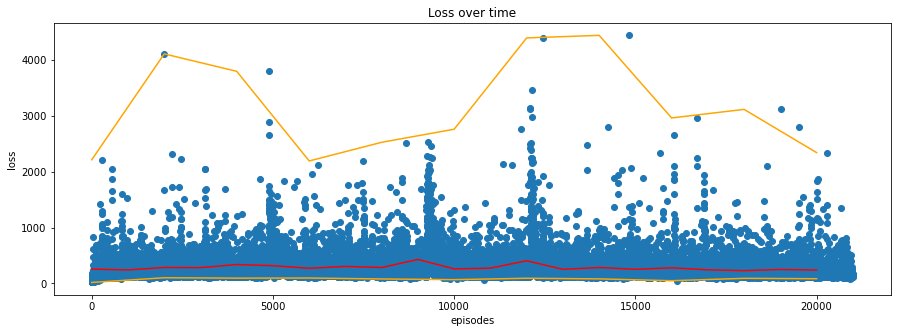

Maximum: 4435.52001953125
Average: 285.292086792513
Moving Average (simple): {0: 257.2, 1000: 241.6, 2000: 285.8, 3000: 283.1, 4000: 338.6, 5000: 318.1, 6000: 271.5, 7000: 304.9, 8000: 285.2, 9000: 430.0, 10000: 260.2, 11000: 274.4, 12000: 405.7, 13000: 253.2, 14000: 285.2, 15000: 253.3, 16000: 280.1, 17000: 243.8, 18000: 229.5, 19000: 249.9, 20000: 239.4}

Moving Average: ['-6% (241.6 | -6%)', '+18% (285.8 | 11%)', '0% (283.1 | 10%)', '+19% (338.6 | 31%)', '-6% (318.1 | 23%)', '-14% (271.5 | 5%)', '+12% (304.9 | 18%)', '-6% (285.2 | 10%)', '+50% (430.0 | 67%)', '-39% (260.2 | 1%)', '+5% (274.4 | 6%)', '+47% (405.7 | 57%)', '-37% (253.2 | -1%)', '+12% (285.2 | 10%)', '-11% (253.3 | -1%)', '+10% (280.1 | 8%)', '-12% (243.8 | -5%)', '-5% (229.5 | -10%)', '+8% (249.9 | -2%)', '-4% (239.4 | -6%)']
Minimum: 18.366613388061523


In [7]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")